In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [48]:
# load sample data
X = np.array([1,2,4,3,5])
Y = np.array([1,3,3,2,5])

### The Equations

w = w − alpha × delta
- w: weights
- alpha: learning rate where we must configure(Ex: 0.1)
- delta: 

linear regression prediction equation: y = B0 + B1 * x

error = p(i) - y(i)

B0(t +1) = B0(t) - alpha * error
B1(t+1) = B1(t) -alpha * error * x

One pass through the training dataset is called an epoch.

In [49]:
# let start by init B0. B1 = 0.0, 0.0
# and set learning rate 0.01
# let run 4 complete epochs of trainning data
B0 = 0.0
B1 = 0.0
alpha = 0.01
epochs = 0
arrB0 = []
arrB1 = []
while True:
    for i in range(len(X)):
        # calculate the prediction
        predicted = B0 + B1 * X[i]
        
        # calculate error
        error = predicted - Y[i]
        
        # update the B0, B1
        B0 = B0 - alpha * error
        B1 = B1 - alpha * error * X[i]
        
        # store B0, B1
        arrB0.append(B0)
        arrB1.append(B1)
    
    epochs += 1
    if epochs >= 4:
        break
    
print('B0', arrB0)
print('-' * 200)
print('B1', arrB1)

B0 [0.01, 0.039700000000000006, 0.066527000000000003, 0.080560489999999998, 0.1188144616, 0.123525533704, 0.14399449036487999, 0.1543254529242008, 0.15787066348506751, 0.18090761708293468, 0.18286982527875553, 0.19854445159535197, 0.20031168611283873, 0.19841101038469214, 0.21354940352837021, 0.21408149048540759, 0.22726519582605495, 0.22458688793154549, 0.2198581740473845, 0.23089749104812557]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
B1 [0.01, 0.069400000000000003, 0.176708, 0.21880847, 0.41007832799999999, 0.41478940010400001, 0.45572731342576001, 0.49705116366304319, 0.50768679534564332, 0.62287156333497917, 0.6248337715308, 0.65618302416399288, 0.6632519622339399, 0.6575499350495001, 0.73324190076789042, 0.73377398772492786, 0.76014139840622263, 0.74942816682818481, 0.73524202517570181, 0.79043861017940709]


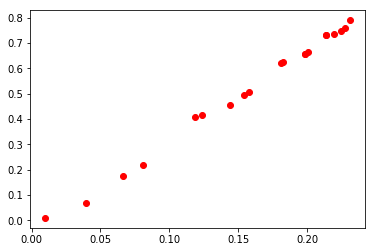

In [50]:
plt.plot(arrB0,arrB1, 'ro')
plt.show()

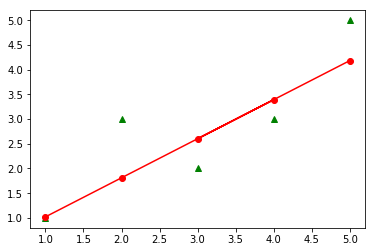

In [51]:
# set  B0, B1 to the last value
B0 = arrB0[-1]
B1 = arrB1[-1]
predicted = ([B0 + B1 * i for i in X])
plt.plot(X,Y, 'g^')
plt.plot(X, predicted,'ro-')
plt.show()

In [52]:
# Estimating Error
predicted_Y = predicted - Y
print('Predicted:', predicted)
print('Y:', Y)
print('Predicted -y:', predicted_Y)

#(error × error or error ^ 2 )
print('squared error', predicted_Y * predicted_Y)
RMSE = math.sqrt(np.sum(predicted_Y * predicted_Y) / len(X))
RMSE

Predicted: [1.0213361012275326, 1.8117747114069398, 3.3926519317657537, 2.6022133215863468, 4.1830905419451607]
Y: [1 3 3 2 5]
Predicted -y: [ 0.0213361  -1.18822529  0.39265193  0.60221332 -0.81690946]
squared error [  4.55229216e-04   1.41187934e+00   1.54175540e-01   3.62660885e-01
   6.67341063e-01]


0.7206264014789554

In [55]:
# put it all together
class GradientDescentLinearRegression:
    def __init__(self, alpha = 0.01, epochs = 4, B0 = 0.0, B1 = 0.0):
        self.alpha = alpha
        self.epochs = epochs
        self.B0 = B0
        self.B1 = B1            
    
    def updateWeights(self, samples, labels):
        for epoch in range(self.epochs):
            for i in range(len(samples)):
                # calculate the prediction
                predicted = self.B0 + self.B1 * samples[i]
            
                # calculate error
                error = predicted - labels[i]
            
                # update the B0, B1
                self.B0 = self.B0 - alpha * error
                self.B1 = self.B1 - alpha * error * samples[i]
            
    def fit(self, samples, labels):
        self.updateWeights(samples, labels)
        print('B0: {}, B1: {} '.format( self.B0,self.B1))
    
    def predict(self, x):
        return self.B0 + self.B1 * x

In [56]:
model = GradientDescentLinearRegression()
model.fit(X,Y)
model.predict(10)

B0: 0.23089749104812557, B1: 0.7904386101794071 


8.135283592842196